In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, classification_report,confusion_matrix
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from xgboost import XGBRFRegressor, XGBRFClassifier


In [2]:
urlfile="https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv"

In [3]:
df=pd.read_csv(urlfile)

In [4]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
df.shape

(891, 12)

In [6]:
df.drop_duplicates().shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## There are no duplicates.

In [9]:
df.drop(columns=['PassengerId','Cabin','Ticket','Name'],inplace=True)

In [10]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

# Preprocessing and EDA on Continuous Columns

In [11]:
continuous=df[['Age','Fare']]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


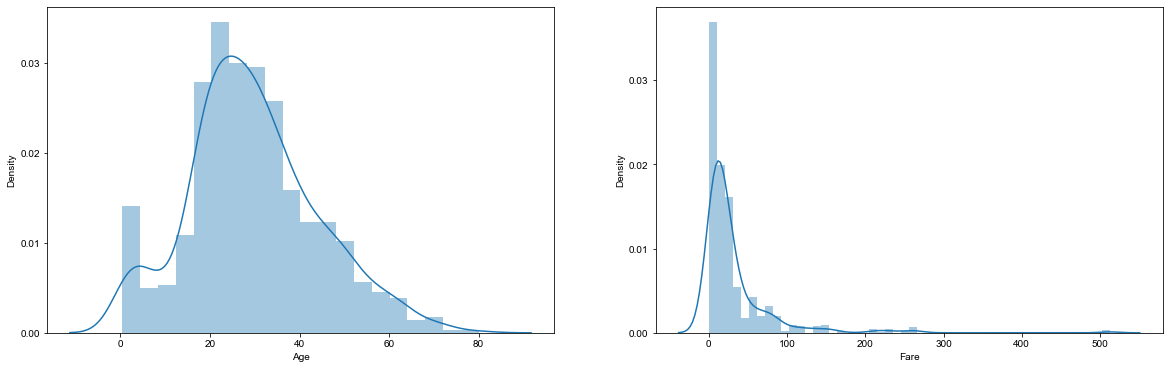

In [12]:
fig,axes=plt.subplots(1,2, figsize=(20,6))
sns.distplot(df['Age'],ax=axes[0])
sns.distplot(df['Fare'],ax=axes[1])
sns.set(font_scale=2)

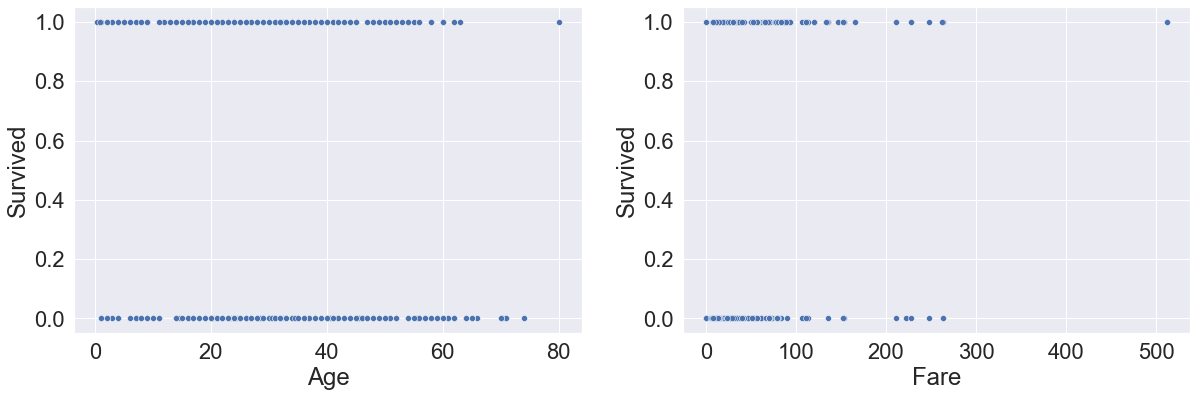

In [13]:
fig,axes=plt.subplots(1,2, figsize=(20,6))
sns.scatterplot(x=df['Age'],y=df['Survived'],ax=axes[0])
sns.scatterplot(x=df['Fare'],y=df['Survived'],ax=axes[1])
sns.set(font_scale=2)

In [14]:
df[list(continuous.columns)+['Survived']].corr()

,Age,Fare,Survived
Age,1.000000,0.096067,-0.077221
Fare,0.096067,1.000000,0.257307
Survived,-0.077221,0.257307,1.000000


In [15]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


## 1. Count Plot-'Sex'

<AxesSubplot:xlabel='Sex', ylabel='count'>

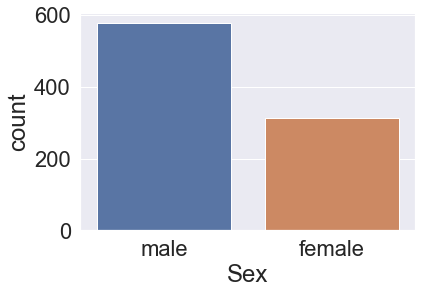

In [16]:
sns.countplot(x=df['Sex'])

## 2. Count Plot-'SibSp'

<AxesSubplot:xlabel='SibSp', ylabel='count'>

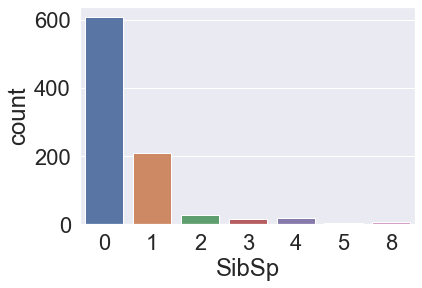

In [17]:
sns.countplot(x=df['SibSp'])

## The values greater than 2 are very less.

## Capping the values above 2 to 2.

In [72]:
df.loc[df['SibSp']>2,'SibSp']=2

## 3. Count Plot-'Parch'

<AxesSubplot:xlabel='Parch', ylabel='count'>

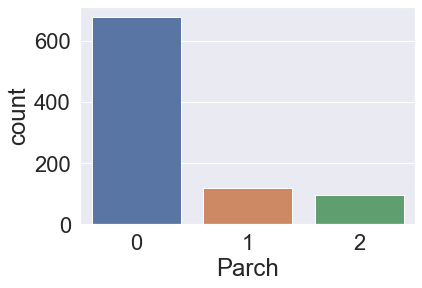

In [73]:
sns.countplot(x=df['Parch'])

## The values greater than 2 are very less.

## Capping the values above 2 to 2.

In [20]:
df.loc[df['Parch']>2,'Parch']=2

## 4. Count Plot-'Embarked'

<AxesSubplot:xlabel='Embarked', ylabel='count'>

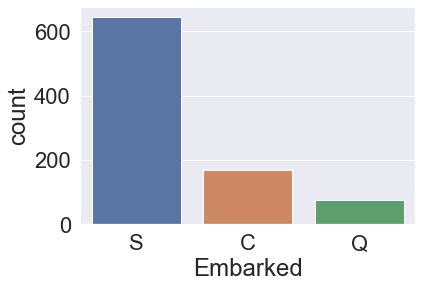

In [21]:
sns.countplot(x=df['Embarked'])

## 5. Count Plot-'Embarked'

<AxesSubplot:xlabel='Pclass', ylabel='count'>

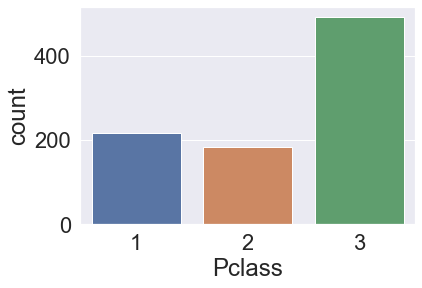

In [22]:
sns.countplot(x=df['Pclass'])


## One Hot Encoding

In [23]:
df=pd.get_dummies(data=df, columns=['Embarked','Sex'],drop_first=True)

In [24]:
df.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,0,3,22.0,1,0,7.2500,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,0


In [25]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### The classes are somewhat imabalanced.

## Imputing the Missing Value is the Age column with the Mean

In [26]:
df.loc[df['Age'].isnull(),'Age']=np.mean(df["Age"])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_Q  891 non-null    uint8  
 7   Embarked_S  891 non-null    uint8  
 8   Sex_male    891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


## Selecting the Dependent and Independent Variables

In [28]:
X=df.drop(['Survived'],axis=1)
y=df['Survived']

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,stratify=y)

In [75]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

## 1. Logistic Regression

In [123]:
lr=LogisticRegression(class_weight='balanced')
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [124]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

In [125]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       384
           1       0.67      0.77      0.72       239

    accuracy                           0.77       623
   macro avg       0.76      0.77      0.76       623
weighted avg       0.78      0.77      0.77       623



In [126]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       165
           1       0.73      0.75      0.74       103

    accuracy                           0.79       268
   macro avg       0.78      0.79      0.78       268
weighted avg       0.80      0.79      0.80       268



In [127]:
accuracy_score(y_test, y_test_pred)

0.7947761194029851

## 2 Decision Tree

In [81]:
dt=DecisionTreeClassifier(max_depth=8,random_state=0,class_weight='balanced')
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, random_state=0)

In [82]:
y_train_pred=dt.predict(X_train)
y_test_pred=dt.predict(X_test)

In [83]:
confusion_matrix(y_train, y_train_pred)

array([[368,  16],
       [ 33, 206]], dtype=int64)

In [84]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       384
           1       0.93      0.86      0.89       239

    accuracy                           0.92       623
   macro avg       0.92      0.91      0.92       623
weighted avg       0.92      0.92      0.92       623



In [85]:
accuracy_score(y_test, y_test_pred)

0.7611940298507462

In [86]:
confusion_matrix(y_test, y_test_pred)

array([[134,  31],
       [ 33,  70]], dtype=int64)

In [87]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       165
           1       0.69      0.68      0.69       103

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



## 3. Support Vector Machine

In [88]:
from sklearn.svm import SVC

In [99]:
sv=SVC(kernel='poly',class_weight='balanced',C=1)
sv.fit(X_train,y_train)

SVC(C=1, class_weight='balanced', kernel='poly')

In [100]:
y_train_pred=sv.predict(X_train)
y_test_pred=sv.predict(X_test)

In [101]:
confusion_matrix(y_train, y_train_pred)

array([[345,  39],
       [ 68, 171]], dtype=int64)

In [102]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       384
           1       0.81      0.72      0.76       239

    accuracy                           0.83       623
   macro avg       0.82      0.81      0.81       623
weighted avg       0.83      0.83      0.83       623



In [103]:
confusion_matrix(y_test, y_test_pred)

array([[151,  14],
       [ 27,  76]], dtype=int64)

In [104]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       165
           1       0.84      0.74      0.79       103

    accuracy                           0.85       268
   macro avg       0.85      0.83      0.83       268
weighted avg       0.85      0.85      0.84       268

